In [ ]:
# to import libaries
import pandas as pd
import numpy as np

In [2]:
# to import libaries
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

In [3]:
#to load and read the data
df_movie = pd.read_csv("IMDb Movies India.csv",encoding="Latin1")

In [4]:
df_movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#to display the data from top
df_movie.head(11)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [6]:
#to print the detailed description of the data
df_movie.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [7]:
#to see the data types
df_movie.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [8]:
#to check missing value or NULL values
df_movie.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [9]:
#To find the total number of missing values in the entire DataFrame
df_movie.isnull().sum().sum()

33523

In [10]:
#to represent the number of rows and columns
df_movie.shape

(15509, 10)

In [11]:
#To view the first few entries in the "Year" column of the
df_movie["Year"].head()

0       NaN
1    (2019)
2    (2021)
3    (2019)
4    (2010)
Name: Year, dtype: object

In [15]:
genre = df_movie['Genre']

In [16]:
#to view the data 
genre.head(11)

0                         Drama
1                         Drama
2                Drama, Musical
3               Comedy, Romance
4                         Drama
5        Comedy, Drama, Musical
6           Drama, Romance, War
7                   Documentary
8     Horror, Mystery, Thriller
9       Action, Crime, Thriller
10                        Drama
Name: Genre, dtype: object

In [17]:
#to splits the values in the "Genre" column
genres = df_movie['Genre'].str.split(', ', expand=True)

In [18]:
#to view the data 
genres.head(11)

,0,1,2
0,Drama,None,None
1,Drama,None,None
2,Drama,Musical,None
3,Comedy,Romance,None
4,Drama,None,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
7,Documentary,None,None
8,Horror,Mystery,Thriller
9,Action,Crime,Thriller


/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


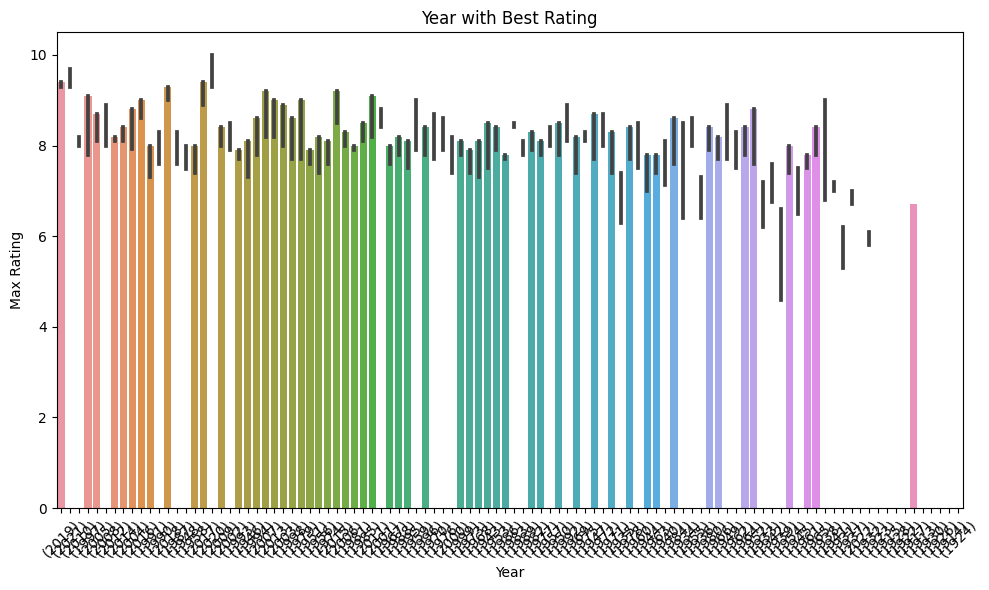

In [19]:
#o create a bar plot showing the maximum rating for each year
plt.figure(figsize=(10, 6))
sns.barplot(data=df_movie, x='Year', y='Rating', estimator=max)
plt.xlabel('Year')
plt.ylabel('Max Rating')
plt.title('Year with Best Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
#to creates a dictionary of genre counts
genre_counts = {}
for genre in genres.values.flatten():
    if genre is not None:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

genereCounts = {genre: count for genre, count in sorted(genre_counts.items(), key=lambda x: str(x[0]))}
for genre, count in genereCounts.items():
    print(f"{genre}: {count}")

Action: 3543
Adventure: 541
Animation: 125
Biography: 208
Comedy: 2029
Crime: 1322
Documentary: 383
Drama: 7243
Family: 943
Fantasy: 458
History: 207
Horror: 524
Music: 90
Musical: 589
Mystery: 513
News: 9
Reality-TV: 3
Romance: 2449
Sci-Fi: 58
Short: 1
Sport: 70
Thriller: 1713
War: 47
Western: 5
nan: 5631


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


TypeError: '<' not supported between instances of 'str' and 'float'

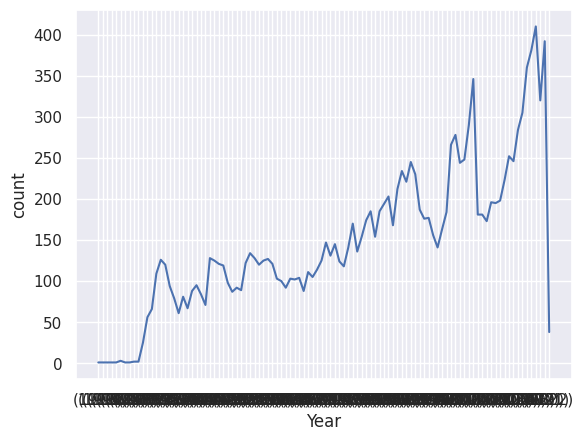

In [21]:
#to create a line plot showing the number of movie releases per year
sns.set(style = "darkgrid", font = "Calibri")
ax = sns.lineplot(data=df_movie['Year'].value_counts().sort_index())
darkgrid_positions = range(min(df_movie['Year']), max(df_movie['Year']) + 1, 5) 
ax.set_title("Annual Movie Release Counts Over Time")
ax.set_darkgrid(darkgrid_positions)
ax.set_darkgridlabels(darkgrid_positions, rotation = 90)
ax.set_xlabel("Years")
ax.set_ylabel("Count")
mpl.show()

top 10 movies overall

In [22]:
#To find the top 10 movies by rating
top_10_movies = df_movie.nlargest(10,'Rating')
print("Top 10 movies by rating: ")
print(top_10_movies)

Top 10 movies by rating: 
                      Name    Year Duration             Genre  Rating Votes  \
8339       Love Qubool Hai  (2020)   94 min    Drama, Romance    10.0     5   
5410            Half Songs  (2021)   79 min    Music, Romance     9.7     7   
2563                 Breed  (2020)      NaN             Drama     9.6    48   
5077          Gho Gho Rani  (2019)  105 min  History, Romance     9.4    47   
6852                  June  (2021)   93 min             Drama     9.4    18   
11704             Ram-Path  (2017)      NaN       Documentary     9.4     5   
14222  The Reluctant Crime  (2020)  113 min             Drama     9.4    16   
1314          Ashok Vatika  (2018)   97 min             Drama     9.3     7   
1729              Baikunth  (2021)   72 min            Family     9.3    29   
5125           God of gods  (2019)   90 min       Documentary     9.3    46   

              Director            Actor 1          Actor 2  \
8339   Saif Ali Sayeed          Ahaan Jha 

In [23]:
#to create a bar plot to visualize the top 10 movies by rating
top_movies = df_movie.nlargest(10, 'Rating')
print("Top 10 movies by rating:")
print(top_movies)
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='rating_column', y='Movie_Title', data=top_10_movies, palette='viridis')
plt.xlabel('Rating') 
plt.ylabel('Movie Title')  
plt.title('Top 10 Movies Overall')  
plt.show()

Top 10 movies by rating:
                      Name    Year Duration             Genre  Rating Votes  \
8339       Love Qubool Hai  (2020)   94 min    Drama, Romance    10.0     5   
5410            Half Songs  (2021)   79 min    Music, Romance     9.7     7   
2563                 Breed  (2020)      NaN             Drama     9.6    48   
5077          Gho Gho Rani  (2019)  105 min  History, Romance     9.4    47   
6852                  June  (2021)   93 min             Drama     9.4    18   
11704             Ram-Path  (2017)      NaN       Documentary     9.4     5   
14222  The Reluctant Crime  (2020)  113 min             Drama     9.4    16   
1314          Ashok Vatika  (2018)   97 min             Drama     9.3     7   
1729              Baikunth  (2021)   72 min            Family     9.3    29   
5125           God of gods  (2019)   90 min       Documentary     9.3    46   

              Director            Actor 1          Actor 2  \
8339   Saif Ali Sayeed          Ahaan Jha  

ValueError: Could not interpret input 'rating_column'

<Figure size 1000x600 with 0 Axes>

In [24]:
#to view the columns 
print(df_movie.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


Number of Popular Movies Released Each Year

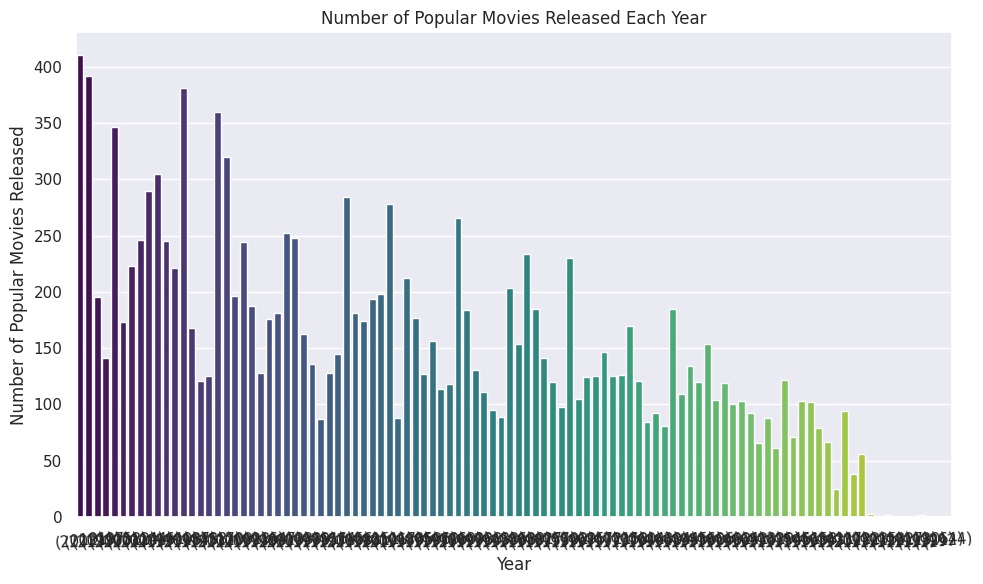

In [25]:
#to create a bar plot showing the number of popular movies releases each year
plt.figure(figsize=(10, 6))
sns.countplot(data=df_movie, x='Year', palette='viridis')
plt.xlabel('Year')
plt.ylabel('Number of Popular Movies Released')
plt.title('Number of Popular Movies Released Each Year')
plt.xticks(rotation=6)  
plt.tight_layout() 
plt.show()

In [27]:
#to Convert 'Votes' column to numeric
df_movie['Votes'] = pd.to_numeric(df_movie['Votes'],errors='coerce')
#to Drop rows with missing values in 'Rating' or 'Votes' columns
df_movie.dropna(subset=['Rating', 'Votes'], inplace=True)

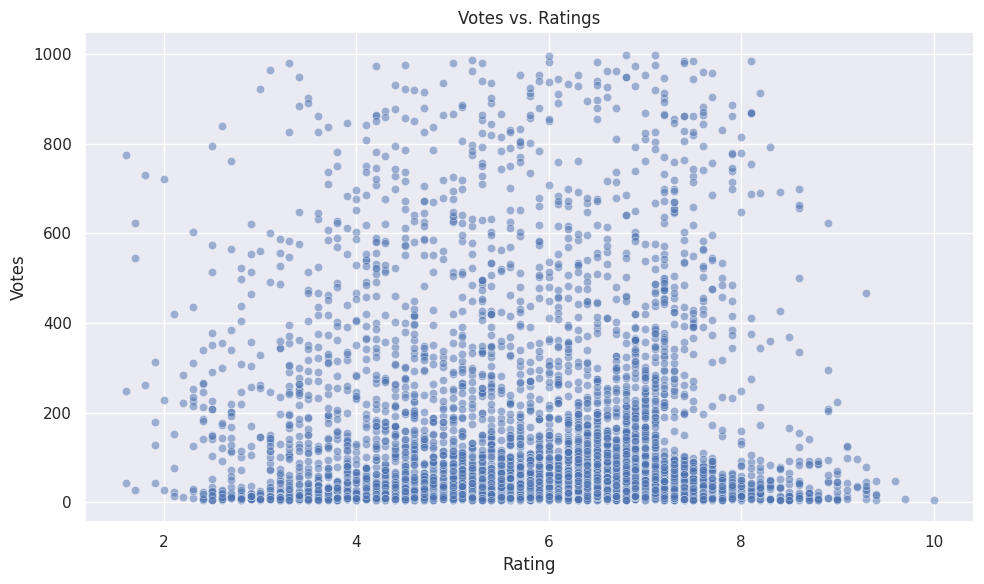

In [28]:
#to creating a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_movie, x='Rating', y='Votes', alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Votes vs. Ratings')
plt.tight_layout()  
plt.show()

In [29]:
#who has directed the most movies
most_directed_director = df_movie['Director'].value_counts().idxmax()
print(most_directed_director)

Kanti Shah


In [30]:
#who is most frequently appearing actor
all_actors = df_movie[['Actor 1', 'Actor 2', 'Actor 3']].stack().value_counts()
most_starred_actor = all_actors.idxmax()
print(most_starred_actor)

Mithun Chakraborty
